## **Part 1** - DOMAIN: Botanical research




*   Importing all libraries



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from skimage import io
from PIL import Image
import os,cv2
# Initialize the random number generator
import random
random.seed(0)
# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_datasets as tfds
from skimage.transform import rescale, resize, downscale_local_mean
from tensorflow.keras.models import Sequential,load_model
from tensorflow_hub import keras_layer
import tensorflow_hub as hub
from tensorflow.keras.layers import Dense,Dropout,Activation,Conv2D,MaxPool2D,Flatten,ReLU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import mean_absolute_error,mean_squared_error
from keras.layers.normalization import BatchNormalization


**1. Import the data. Analyse the dimensions of the data. Visualise the data**
*   Creating a Dataframe and loading all images with their class names
*   Image Source: https://www.kaggle.com/c/plant-seedlings-classification/data



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

#Train data
project_path = '/content/drive/My Drive/Data Science/Project 8/Part1/train/'
training_data = pd.DataFrame(columns=['filename','class'])
for dirname,j,filenames in os.walk(project_path):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        class_label = dirname.split('/')[-1]
        training_data = training_data.append({'filename':path , 'class':class_label}, ignore_index = True)

# Test data
test_path = '/content/drive/My Drive/Data Science/Project 8/Part1/test/'
test_data = pd.DataFrame(columns=['filename'])
for dirname,j,filenames in os.walk(test_path):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        test_data = test_data.append({'filename':path}, ignore_index = True)        

In [ ]:
training_data.shape
#4771 rows of training data and classes is the actual labels of the image

(4771, 2)

In [ ]:
test_data.shape
#794 rows of test  data and classes is the actual labels of the image

(794, 1)

Black-grass



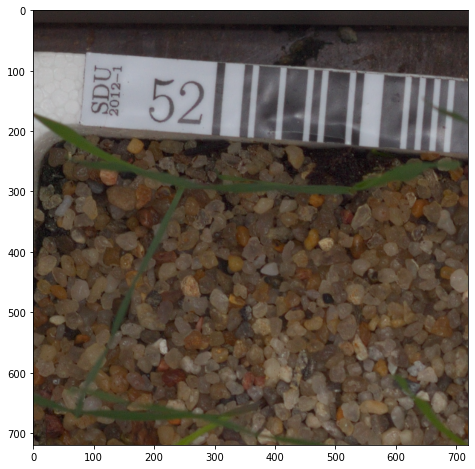

In [ ]:
print(training_data['class'].iloc[113]+'\n')
plt.figure(figsize=(12,8))
plt.imshow(io.imread(training_data['filename'].iloc[113]))
# Visuvalizing one of the training image

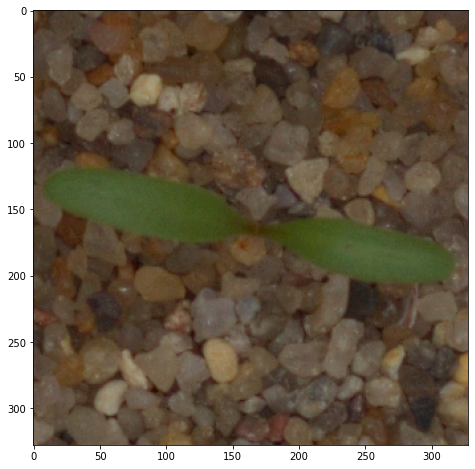

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(io.imread(test_data['filename'].iloc[514]))
# Visuvalizing one of the test image

In [ ]:
shapes_images = [io.imread(training_data['filename'].iloc[i]).shape[0] for i in range(0,training_data.shape[0]-1)]           

In [ ]:
len(set(shapes_images))
#We have 990 different shape images, we have to resize all of them before applying in a Neural Network model

990

In [ ]:
min(set(shapes_images))
#minimum size

49

In [ ]:
# for i in range(training_data.shape[0]-1):
#   if io.imread(training_data['filename'].iloc[1]).shape[2] != 4:
#     print(True)
#   else:
#     print(False)

* We have various(992) shapes of data and also images of 3 dimensions and 4 dimensions
*   We focus on converting all of those to 45 * 45 * 1 to train Neural Networks

>> Use the below mentioned incase you wish to rerun the below code as we have already saved the numpy arrays, only 3 channel data has been saved as 1 channel data does not give good prediction

**Saving numpy array**

np.savez('/content/drive/My Drive/Data Science/Project 8/Part1/resized_arrays.npz',name1 = X_train_resized_3,name2 = X_test_resized_3)

**Load numpy array**

load = np.load('/content/drive/My Drive/Data Science/Project 8/Part1/resized_arrays.npz')



In [ ]:
#1 channel Gray scale image
X_train_resized = np.zeros((training_data.shape[0], 45, 45))
for i in range(training_data.shape[0]-1):
  if io.imread(training_data['filename'].iloc[i]).shape[2] == 4:
    X_train_resized[i,:,:] = cv2.resize(io.imread(training_data['filename'].iloc[i],as_gray=True), dsize=(45, 45), interpolation=cv2.INTER_CUBIC)
  else:
    X_train_resized[i,:,:] = cv2.resize(io.imread(training_data['filename'].iloc[i],as_gray=True), dsize=(45, 45), interpolation=cv2.INTER_CUBIC)

X_test_resized = np.zeros((test_data.shape[0], 45, 45))
for i in range(test_data.shape[0]-1):
  if io.imread(test_data['filename'].iloc[i]).shape[2] == 4:
    X_test_resized[i,:,:] = cv2.resize(io.imread(test_data['filename'].iloc[i],as_gray=True), dsize=(45, 45), interpolation=cv2.INTER_CUBIC)
  else:
    X_test_resized[i,:,:] = cv2.resize(io.imread(test_data['filename'].iloc[i],as_gray=True), dsize=(45, 45), interpolation=cv2.INTER_CUBIC)    

In [ ]:
X_train_resized_3 = np.zeros((training_data.shape[0], 45, 45,3))
for i in range(training_data.shape[0]-1):
  if io.imread(training_data['filename'].iloc[i]).shape[2] == 4:
    X_train_resized_3[i,:,:] = resize(np.array(Image.open(training_data['filename'].iloc[i]).convert('RGB')),(45,45,3))
  else:
    X_train_resized_3[i,:,:] = resize(io.imread(training_data['filename'].iloc[i]),(45,45,3))

X_test_resized_3 = np.zeros((test_data.shape[0], 45, 45,3))
for i in range(test_data.shape[0]-1):
  if io.imread(test_data['filename'].iloc[i]).shape[2] == 4:
    X_test_resized_3[i,:,:] = resize(np.array(Image.open(test_data['filename'].iloc[i]).convert('RGB')),(45,45,3))
  else:
    X_test_resized_3[i,:,:] = resize(io.imread(test_data['filename'].iloc[i]),(45,45,3))

In [ ]:
# load = np.load('/content/drive/My Drive/Data Science/Project 8/Part1/resized_arrays.npz')
# X_train_resized_3 = load['name1']
# X_test_resized_3= load['name2']
# To be used when we re run the whole code from first to save time

In [ ]:
X_train_resized_3.shape

(4771, 45, 45, 3)

In [ ]:
X_test_resized_3.shape

(794, 45, 45, 3)



*  Normalizing the data points to apply in neural networks



In [ ]:
#1 channel gray scale
X_train_resized = X_train_resized.astype('float32')
X_test_resized = X_test_resized.astype('float32')
X_train_normalized = X_train_resized/X_train_resized.max()
X_test_normalized = X_test_resized/X_test_resized.max()


#3 channel rgb image
X_train_resized_3 = X_train_resized_3.astype('float32')
X_test_resized_3 = X_test_resized_3.astype('float32')
X_train_normalized_3 = X_train_resized_3/X_train_resized_3.max()
X_test_normalized_3 = X_test_resized_3/X_test_resized_3.max()

In [ ]:
X_train_normalized.min()

-0.0049581854

In [ ]:
X_train_normalized.max()

1.0

In [ ]:
X_train_normalized_3.min()

0.0

In [ ]:
X_train_normalized_3.max()

1.0

2. Train tune and test AIML image classifier model using:
*   Use supervised learning algorithms for training
*   Use neural networks for training
*   Use CNN for training




In [ ]:
train = training_data.copy()
train['class'] = train['class'].replace({'Black-grass':0, 'Charlock':1, 'Cleavers':2, 'Common Chickweed':3,
       'Shepherds Purse':4, 'Small-flowered Cranesbill':5, 'Sugar beet':6,
       'Scentless Mayweed':7, 'Loose Silky-bent':8, 'Common wheat':9, 'Maize':10,
       'Fat Hen':11})

train_class = to_categorical(train['class'])
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_train_normalized, train_class, test_size=0.3, random_state=42)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_train_normalized_3, train_class, test_size=0.3, random_state=42)

In [ ]:
X_train_1 = X_train_1.reshape(X_train_1.shape[0],(X_train_1.shape[1]*X_train_1.shape[2]))
X_test_1 = X_test_1.reshape(X_test_1.shape[0],(X_test_1.shape[1]*X_test_1.shape[2]))
X_test_normalized = X_test_normalized.reshape(X_test_normalized.shape[0],(X_test_normalized.shape[1]*X_test_normalized.shape[2]))

X_train_3 = X_train_3.reshape(X_train_3.shape[0],6075)
X_test_3 = X_test_3.reshape(X_test_3.shape[0],6075)
X_test_normalized_3 = X_test_normalized_3.reshape(X_test_normalized_3.shape[0],6075)

In [ ]:
X_train_3.shape

(3339, 6075)

In [ ]:
y_train_3.shape

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

***1. Training a ML model, we take Logistic regression***
---

1. Model LG contains 1 dimensional gray scale image and has a very bad prediciton
2. Model LG1 contains 3 channel RGB image and has a accuracy of 48%, better
3. We are performing any tuning on the model as the request is to use a supervised learning algorithm





In [ ]:
y_train_1 = pd.Series([np.argmax(i) for i in y_train_1])
y_test_1 = pd.Series([np.argmax(i) for i in y_test_1])
LG = LogisticRegression()
LG.fit(X_train_1,y_train_1)
pred = LG.predict(X_test_1)

In [ ]:
print(classification_report(y_test_1,pred))
#Very bad prediction 15% accuracy for Gray scale image

              precision    recall  f1-score   support

           0       0.16      0.08      0.10        89
           1       0.11      0.10      0.11       120
           2       0.21      0.17      0.19        88
           3       0.21      0.28      0.24       194
           4       0.03      0.01      0.02        68
           5       0.16      0.18      0.17       142
           6       0.14      0.09      0.11       116
           7       0.12      0.16      0.13       146
           8       0.16      0.21      0.18       196
           9       0.08      0.03      0.04        70
          10       0.06      0.05      0.05        61
          11       0.12      0.12      0.12       142

    accuracy                           0.15      1432
   macro avg       0.13      0.12      0.12      1432
weighted avg       0.14      0.15      0.14      1432



In [ ]:
y_train_3 = pd.Series([np.argmax(i) for i in y_train_3])
y_test_3 = pd.Series([np.argmax(i) for i in y_test_3])
LG1 = LogisticRegression()
LG1.fit(X_train_3,y_train_3)
pred1 = LG1.predict(X_test_3)

In [ ]:
print(classification_report(y_test_3,pred1))
#comparitively better performance 48% accuracy

              precision    recall  f1-score   support

           0       0.36      0.33      0.34        89
           1       0.62      0.65      0.63       120
           2       0.60      0.56      0.58        88
           3       0.54      0.56      0.55       194
           4       0.39      0.25      0.30        68
           5       0.71      0.75      0.73       142
           6       0.46      0.41      0.43       116
           7       0.48      0.53      0.51       146
           8       0.54      0.60      0.57       196
           9       0.26      0.17      0.21        70
          10       0.35      0.30      0.32        61
          11       0.42      0.49      0.45       142

    accuracy                           0.51      1432
   macro avg       0.48      0.47      0.47      1432
weighted avg       0.50      0.51      0.50      1432



In [ ]:
#Making a prediction using TEST data, test_data is a dataframe that contains all test imagees path
Test_pred_lg = LG1.predict(X_test_normalized_3)
test_data['prediction_Logit_3channel'] = Test_pred_lg
test_data['prediction_Logit_3channel'] = test_data['prediction_Logit_3channel'].replace({0:'Black-grass', 1:'Charlock', 2:'Cleavers', 3:'Common Chickweed',
       4:'Shepherds Purse', 5:'Small-flowered Cranesbill', 6:'Sugar beet',
       7:'Scentless Mayweed', 8:'Loose Silky-bent', 9:'Common wheat', 10:'Maize',
       11:'Fat Hen'})

***2.1 Training a neural network with 3 channel RGB data***
* For now we are not tuning the model as the request it to only show the Neural Network model with data
* If we were to tune the model, we have a lot of hyperparameters:
    1. Number of layers
    2. Number of Neurons
    3. Optimizers such as SGD, RMSprop, Adam and their Learning rate, Momentum and Decay
    4. Regularization : Adding Dropout layers, adding batch normalization
    5. Trying out different callbacks with different patience and delta value






In [ ]:
y_train_3 = to_categorical(y_train_3)
y_train_1 = to_categorical(y_train_1)
y_test_3 = to_categorical(y_test_3)
y_test_1 = to_categorical(y_test_1)

In [ ]:
y_train_3.shape

(3339, 12)

In [ ]:
model = Sequential()
model.add(Dense(6000,activation='relu',input_shape=(6075,)))
model.add(Dense(3000,activation='relu'))
model.add(Dense(1500,activation='relu'))
model.add(Dense(700,activation='relu'))
model.add(Dense(350,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(70,activation='relu'))
model.add(Dense(12,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 6000)              36456000  
_________________________________________________________________
dense_9 (Dense)              (None, 3000)              18003000  
_________________________________________________________________
dense_10 (Dense)             (None, 1500)              4501500   
_________________________________________________________________
dense_11 (Dense)             (None, 700)               1050700   
_________________________________________________________________
dense_12 (Dense)             (None, 350)               245350    
_________________________________________________________________
dense_13 (Dense)             (None, 150)               52650     
_________________________________________________________________
dense_14 (Dense)             (None, 70)               

In [ ]:
ES = EarlyStopping(monitor='val_accuracy',min_delta=0.1,mode='max',patience=15)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
model.fit(X_train_3,y_train_3,epochs=100,callbacks=ES,validation_data=(X_test_3,y_test_3))

Epoch 1/100
105/105 [==============================] - 7s 38ms/step - loss: 2.5881 - accuracy: 0.1228 - val_loss: 2.4353 - val_accuracy: 0.1369
Epoch 2/100
105/105 [==============================] - 3s 31ms/step - loss: 2.3770 - accuracy: 0.1593 - val_loss: 2.3377 - val_accuracy: 0.1550
Epoch 3/100
105/105 [==============================] - 3s 31ms/step - loss: 2.2080 - accuracy: 0.2126 - val_loss: 2.0111 - val_accuracy: 0.2472
Epoch 4/100
105/105 [==============================] - 3s 32ms/step - loss: 2.0415 - accuracy: 0.2489 - val_loss: 1.9494 - val_accuracy: 0.3052
Epoch 5/100
105/105 [==============================] - 3s 32ms/step - loss: 1.9414 - accuracy: 0.2719 - val_loss: 2.1453 - val_accuracy: 0.2095
Epoch 6/100
105/105 [==============================] - 3s 32ms/step - loss: 1.9108 - accuracy: 0.2749 - val_loss: 1.9026 - val_accuracy: 0.2737
Epoch 7/100
105/105 [==============================] - 3s 32ms/step - loss: 1.9176 - accuracy: 0.2941 - val_loss: 2.0298 - val_accuracy:

In [ ]:
X_train_3.shape

(3339, 6075)

In [ ]:
X_test_3.shape

(1432, 6075)

In [ ]:
pred = model.predict_classes(X_test_3)
actual = pd.Series([np.argmax(i) for i in y_test_3])

#Here df is the split of train and test data from the actual training data. We do know what is the label for test data
df = pd.DataFrame(actual,columns=['Actuals'])
df['Predicted_NN_3Channel'] = pred
Replacement = {0:'Black-grass', 1:'Charlock', 2:'Cleavers', 3:'Common Chickweed',
       4:'Shepherds Purse', 5:'Small-flowered Cranesbill', 6:'Sugar beet',
       7:'Scentless Mayweed', 8:'Loose Silky-bent', 9:'Common wheat', 10:'Maize',
       11:'Fat Hen'}
df = df.replace(Replacement)

In [ ]:
print(classification_report(df['Predicted_NN_3Channel'],df['Actuals']))

                           precision    recall  f1-score   support

              Black-grass       0.00      0.00      0.00         0
                 Charlock       0.59      0.68      0.63       104
                 Cleavers       0.38      0.43      0.40        77
         Common Chickweed       0.65      0.53      0.58       240
             Common wheat       0.00      0.00      0.00         0
                  Fat Hen       0.26      0.41      0.32        90
         Loose Silky-bent       0.77      0.53      0.62       285
                    Maize       0.13      0.67      0.22        12
        Scentless Mayweed       0.26      0.29      0.28       129
          Shepherds Purse       0.04      0.12      0.07        24
Small-flowered Cranesbill       0.60      0.35      0.44       245
               Sugar beet       0.74      0.38      0.50       226

                 accuracy                           0.44      1432
                macro avg       0.37      0.37      0.34    

In [ ]:
confusion_matrix(df['Predicted_NN_3Channel'],df['Actuals'])

array([[ 32,   0,   0,   0,  11,   6,  36,   0,   0,   0,   0,   0],
       [  0,  71,   9,   1,   0,   2,   0,   0,   2,   6,  19,   1],
       [  4,   9,  41,   5,   6,   6,   4,   0,   2,   0,  22,   5],
       [  0,   0,   1, 135,   0,  17,   2,  22,  68,  27,   9,  17],
       [  0,   0,   0,   0,   2,   1,   1,   0,   0,   0,   0,   0],
       [  7,   0,   1,   0,  10,  38,  23,   0,   4,   0,   0,  14],
       [ 42,   0,   0,   0,  23,  19, 119,   0,   1,   0,   0,   2],
       [  0,   2,   0,  17,   0,   0,   0,  22,   5,   6,   1,   0],
       [  0,   5,   3,  14,   3,   8,   1,   6,  31,   7,  19,   8],
       [  0,   1,   0,   0,   0,   0,   0,   0,   1,   5,   2,   0],
       [  0,  31,  28,  12,   1,  14,   0,  10,  15,  14,  63,   4],
       [  4,   1,   5,  10,  14,  31,  10,   1,  17,   3,   7,  65]])

In [ ]:
# Now we are predicting for Actual test data 
Test_pred = model.predict_classes(X_test_normalized_3)
test_data['prediction_NN_3channel'] = Test_pred
test_data['prediction_NN_3channel'] = test_data['prediction_NN_3channel'].replace({0:'Black-grass', 1:'Charlock', 2:'Cleavers', 3:'Common Chickweed',
       4:'Shepherds Purse', 5:'Small-flowered Cranesbill', 6:'Sugar beet',
       7:'Scentless Mayweed', 8:'Loose Silky-bent', 9:'Common wheat', 10:'Maize',
       11:'Fat Hen'})

In [ ]:
test_data.head(3)
#Prediction on actual test data with model names

filename  ... prediction_NN_3channel
0  /content/drive/My Drive/Data Science/Project 8...  ...               Cleavers
1  /content/drive/My Drive/Data Science/Project 8...  ...       Loose Silky-bent
2  /content/drive/My Drive/Data Science/Project 8...  ...                Fat Hen

[3 rows x 3 columns]

***2.2 Training a neural network with 1 channel Grayscale image***


---
1. Model seems to have a very bad prediction as gray scale does not support much.
2. It is harder to visuvalize a leaf in color image and it will definetly be harder to visuvalize in gray scale
---

***Since the model has a very bad accuracy in both training and also validation, we are not making any prediciton***







In [ ]:
model1 = Sequential()
model1.add(Dense(3000,activation='relu',input_shape=(2025,)))
model1.add(Dense(1500,activation='relu'))
model1.add(Dense(700,activation='relu'))
model1.add(Dense(350,activation='relu'))
model1.add(Dense(150,activation='relu'))
model1.add(Dense(70,activation='relu'))
model1.add(Dense(35,activation='relu'))
model1.add(Dense(12,activation='softmax'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 3000)              6078000   
_________________________________________________________________
dense_9 (Dense)              (None, 1500)              4501500   
_________________________________________________________________
dense_10 (Dense)             (None, 700)               1050700   
_________________________________________________________________
dense_11 (Dense)             (None, 350)               245350    
_________________________________________________________________
dense_12 (Dense)             (None, 150)               52650     
_________________________________________________________________
dense_13 (Dense)             (None, 70)                10570     
_________________________________________________________________
dense_14 (Dense)             (None, 35)               

In [ ]:
ES = EarlyStopping(monitor='val_accuracy',min_delta=0.1,mode='max',patience=15)
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
model1.fit(X_train_1,y_train_1,epochs=10,callbacks=ES,validation_data=(X_test_1,y_test_1))

Epoch 1/10
105/105 [==============================] - 1s 9ms/step - loss: 2.4667 - accuracy: 0.1180 - val_loss: 2.4579 - val_accuracy: 0.1355
Epoch 2/10
105/105 [==============================] - 1s 6ms/step - loss: 2.4385 - accuracy: 0.1252 - val_loss: 2.4238 - val_accuracy: 0.1369
Epoch 3/10
105/105 [==============================] - 1s 6ms/step - loss: 2.4240 - accuracy: 0.1267 - val_loss: 2.4190 - val_accuracy: 0.1362
Epoch 4/10
105/105 [==============================] - 1s 7ms/step - loss: 2.4184 - accuracy: 0.1423 - val_loss: 2.4822 - val_accuracy: 0.1355
Epoch 5/10
105/105 [==============================] - 1s 7ms/step - loss: 2.4205 - accuracy: 0.1345 - val_loss: 2.4164 - val_accuracy: 0.1369
Epoch 6/10
105/105 [==============================] - 1s 7ms/step - loss: 2.4153 - accuracy: 0.1336 - val_loss: 2.4306 - val_accuracy: 0.1369
Epoch 7/10
105/105 [==============================] - 1s 7ms/step - loss: 2.4097 - accuracy: 0.1414 - val_loss: 2.4204 - val_accuracy: 0.1550
Epoch 

***3.1 Training a Convolutional neural network with 1 channel Grayscale image***


---
1. Model seems to have a very bad prediction as gray scale does not support much.
2. It is harder to visuvalize a leaf in color image and it will definetly be harder to visuvalize in gray scale
3. We also know that a gray scale image wont help much on prediction, hence we run only 20 epochs on gray scale in CNN
---

***Since the model has a very bad accuracy in both training and also validation, we are not making any prediciton***







In [ ]:
#Reshaping it back to older dimensions to see how CNN handles if images are passed directly
X_train_1 = X_train_1.reshape(X_train_1.shape[0],45,45)
X_test_1 = X_test_1.reshape(X_test_1.shape[0],45,45)
X_test_normalized = X_test_normalized.reshape(X_test_normalized.shape[0],45,45)

X_train_3 = X_train_3.reshape(X_train_3.shape[0],45,45,3)
X_test_3 = X_test_3.reshape(X_test_3.shape[0],45,45,3)
X_test_normalized_3 = X_test_normalized_3.reshape(X_test_normalized_3.shape[0],45,45,3)

In [ ]:
X_train_3.shape

(3339, 45, 45, 3)

In [ ]:
y_train_3.shape

(3339, 12)

In [ ]:
X_test_3.shape

(1432, 45, 45, 3)

In [ ]:
y_test_3.shape

(1432, 12)

In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv2D(filters=55,kernel_size=3,input_shape=(45,45,3,),activation='relu'))
model_cnn.add(Conv2D(filters=60,kernel_size=3,activation='relu'))
model_cnn.add(MaxPool2D(pool_size=(2, 2))) #,strides=2
model_cnn.add(Flatten())
model_cnn.add(Dense(80,activation='relu'))
model_cnn.add(Dense(40,activation='relu'))
model_cnn.add(Dense(12,activation='softmax'))

***Testing Adam, RMSprop & SGD optimizer for 10 epochs***
---
We notice that Adam has a better performance edge over other optmizers



In [ ]:
ES = EarlyStopping(monitor='val_accuracy',min_delta=0.1,mode='max',patience=15)
Adam = optimizers.Adam(learning_rate=0.01)
model_cnn.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=Adam)
model_cnn.fit(X_train_3,y_train_3,epochs=10,validation_data=(X_test_3,y_test_3))

Epoch 1/10
105/105 [==============================] - 30s 14ms/step - loss: 2.8989 - accuracy: 0.1336 - val_loss: 2.4224 - val_accuracy: 0.1355
Epoch 2/10
105/105 [==============================] - 1s 11ms/step - loss: 2.4199 - accuracy: 0.1354 - val_loss: 2.4213 - val_accuracy: 0.1369
Epoch 3/10
105/105 [==============================] - 1s 10ms/step - loss: 2.4193 - accuracy: 0.1372 - val_loss: 2.4190 - val_accuracy: 0.1369
Epoch 4/10
105/105 [==============================] - 1s 10ms/step - loss: 2.4190 - accuracy: 0.1372 - val_loss: 2.4186 - val_accuracy: 0.1369
Epoch 5/10
105/105 [==============================] - 1s 10ms/step - loss: 2.4192 - accuracy: 0.1360 - val_loss: 2.4190 - val_accuracy: 0.1369
Epoch 6/10
105/105 [==============================] - 1s 10ms/step - loss: 2.4187 - accuracy: 0.1372 - val_loss: 2.4199 - val_accuracy: 0.1369
Epoch 7/10
105/105 [==============================] - 1s 10ms/step - loss: 2.4179 - accuracy: 0.1279 - val_loss: 2.4204 - val_accuracy: 0.136

***Testing Stochastic Gradient Descent for 10 Epochs***

In [ ]:
ES = EarlyStopping(monitor='val_accuracy',min_delta=0.1,mode='max',patience=15)
sgd = optimizers.SGD(learning_rate=0.01,momentum=0.01,nesterov=True)
model_cnn.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=sgd)
model_cnn.fit(X_train_3,y_train_3,epochs=10,validation_data=(X_test_3,y_test_3))

Epoch 1/10
105/105 [==============================] - 2s 14ms/step - loss: 2.4156 - accuracy: 0.1372 - val_loss: 2.4192 - val_accuracy: 0.1369
Epoch 2/10
105/105 [==============================] - 1s 11ms/step - loss: 2.4155 - accuracy: 0.1372 - val_loss: 2.4191 - val_accuracy: 0.1369
Epoch 3/10
105/105 [==============================] - 1s 10ms/step - loss: 2.4153 - accuracy: 0.1372 - val_loss: 2.4190 - val_accuracy: 0.1369
Epoch 4/10
105/105 [==============================] - 1s 11ms/step - loss: 2.4153 - accuracy: 0.1372 - val_loss: 2.4190 - val_accuracy: 0.1369
Epoch 5/10
105/105 [==============================] - 1s 11ms/step - loss: 2.4152 - accuracy: 0.1372 - val_loss: 2.4189 - val_accuracy: 0.1369
Epoch 6/10
105/105 [==============================] - 1s 10ms/step - loss: 2.4152 - accuracy: 0.1372 - val_loss: 2.4189 - val_accuracy: 0.1369
Epoch 7/10
105/105 [==============================] - 1s 11ms/step - loss: 2.4152 - accuracy: 0.1372 - val_loss: 2.4189 - val_accuracy: 0.1369

***Testing RMS prop optimizer for 10 epochs***

In [ ]:
ES = EarlyStopping(monitor='val_accuracy',min_delta=0.1,mode='max',patience=15)
rms = optimizers.RMSprop()
model_cnn.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=rms)
model_cnn.fit(X_train_3,y_train_3,epochs=10,validation_data=(X_test_3,y_test_3))

Epoch 1/10
105/105 [==============================] - 2s 13ms/step - loss: 2.4156 - accuracy: 0.1372 - val_loss: 2.4188 - val_accuracy: 0.1369
Epoch 2/10
105/105 [==============================] - 1s 11ms/step - loss: 2.4155 - accuracy: 0.1372 - val_loss: 2.4189 - val_accuracy: 0.1369
Epoch 3/10
105/105 [==============================] - 1s 11ms/step - loss: 2.4155 - accuracy: 0.1372 - val_loss: 2.4190 - val_accuracy: 0.1369
Epoch 4/10
105/105 [==============================] - 1s 11ms/step - loss: 2.4155 - accuracy: 0.1372 - val_loss: 2.4190 - val_accuracy: 0.1369
Epoch 5/10
105/105 [==============================] - 1s 11ms/step - loss: 2.4155 - accuracy: 0.1372 - val_loss: 2.4190 - val_accuracy: 0.1369
Epoch 6/10
105/105 [==============================] - 1s 11ms/step - loss: 2.4155 - accuracy: 0.1372 - val_loss: 2.4190 - val_accuracy: 0.1369
Epoch 7/10
105/105 [==============================] - 1s 12ms/step - loss: 2.4155 - accuracy: 0.1372 - val_loss: 2.4190 - val_accuracy: 0.1369

***1. Working on Adam optimizer and also adding Dropouts***

In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv2D(filters=45,kernel_size=3,activation='relu',input_shape=(45,45,3,)))
model_cnn.add(Dropout(0.2))
model_cnn.add(Conv2D(filters=62,kernel_size=3,activation='relu'))
model_cnn.add(Dropout(0.2))
model_cnn.add(MaxPool2D(pool_size=(2, 2))) #,strides=2
model_cnn.add(Flatten())
model_cnn.add(Dense(80,activation='relu'))
model_cnn.add(Dropout(0.4))
model_cnn.add(Dense(40,activation='relu'))
model_cnn.add(Dense(12,activation='softmax'))
ES = EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=15)
adam = optimizers.Adam(learning_rate=0.001,decay=1e-6)
model_cnn.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=adam)
model_cnn.fit(X_train_3,y_train_3,epochs=500,validation_data=(X_test_3,y_test_3),callbacks=[ES])

Epoch 1/500
105/105 [==============================] - 2s 15ms/step - loss: 2.4522 - accuracy: 0.1192 - val_loss: 2.4267 - val_accuracy: 0.1369
Epoch 2/500
105/105 [==============================] - 1s 11ms/step - loss: 2.3237 - accuracy: 0.1938 - val_loss: 2.0777 - val_accuracy: 0.2912
Epoch 3/500
105/105 [==============================] - 1s 11ms/step - loss: 1.9540 - accuracy: 0.3082 - val_loss: 1.6770 - val_accuracy: 0.3876
Epoch 4/500
105/105 [==============================] - 1s 11ms/step - loss: 1.6743 - accuracy: 0.3992 - val_loss: 1.5042 - val_accuracy: 0.5230
Epoch 5/500
105/105 [==============================] - 1s 11ms/step - loss: 1.5643 - accuracy: 0.4361 - val_loss: 1.4063 - val_accuracy: 0.5475
Epoch 6/500
105/105 [==============================] - 1s 11ms/step - loss: 1.4244 - accuracy: 0.4948 - val_loss: 1.2730 - val_accuracy: 0.5663
Epoch 7/500
105/105 [==============================] - 1s 11ms/step - loss: 1.3855 - accuracy: 0.5055 - val_loss: 1.2581 - val_accuracy:

In [ ]:
X_test_3.shape

(1432, 6075)

***2. Stochastic Gradient Descent (Better Model with Nesterov=True)***

In [ ]:
model_cnn_sgd = Sequential()
model_cnn_sgd.add(Conv2D(filters=55,kernel_size=3,activation='relu',input_shape=(45,45,3,)))
model_cnn_sgd.add(Dropout(0.2))
model_cnn_sgd.add(Conv2D(filters=62,kernel_size=3,activation='relu'))
model_cnn_sgd.add(Dropout(0.2))
model_cnn_sgd.add(MaxPool2D(pool_size=(2, 2))) #,strides=2
model_cnn_sgd.add(Flatten())
model_cnn_sgd.add(Dense(100,activation='relu'))
model_cnn_sgd.add(Dropout(0.2))
model_cnn_sgd.add(Dense(80,activation='relu'))
model_cnn_sgd.add(Dropout(0.2))
model_cnn_sgd.add(Dense(40,activation='relu'))
model_cnn_sgd.add(Dropout(0.2))
model_cnn_sgd.add(Dense(12,activation='softmax'))
ES = EarlyStopping(monitor='val_accuracy',min_delta=0.01,mode='max',patience=25)
sgd = optimizers.SGD(learning_rate=0.01,momentum=0.01,nesterov=True)
model_cnn_sgd.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=sgd)
model_cnn_sgd.fit(X_train_3,y_train_3,epochs=500,validation_data=(X_test_3,y_test_3),callbacks=[ES])

Epoch 1/500
105/105 [==============================] - 3s 25ms/step - loss: 2.4649 - accuracy: 0.1285 - val_loss: 2.4541 - val_accuracy: 0.1376
Epoch 2/500
105/105 [==============================] - 2s 20ms/step - loss: 2.4497 - accuracy: 0.1189 - val_loss: 2.4410 - val_accuracy: 0.1397
Epoch 3/500
105/105 [==============================] - 2s 20ms/step - loss: 2.4403 - accuracy: 0.1336 - val_loss: 2.4401 - val_accuracy: 0.1369
Epoch 4/500
105/105 [==============================] - 2s 20ms/step - loss: 2.4287 - accuracy: 0.1447 - val_loss: 2.4236 - val_accuracy: 0.1571
Epoch 5/500
105/105 [==============================] - 2s 20ms/step - loss: 2.4208 - accuracy: 0.1444 - val_loss: 2.4203 - val_accuracy: 0.1983
Epoch 6/500
105/105 [==============================] - 2s 20ms/step - loss: 2.4055 - accuracy: 0.1710 - val_loss: 2.4078 - val_accuracy: 0.1620
Epoch 7/500
105/105 [==============================] - 2s 20ms/step - loss: 2.3828 - accuracy: 0.1872 - val_loss: 2.4117 - val_accuracy:

***3. RMS Prop optimizer***

In [ ]:
model_cnn_rms = Sequential()
model_cnn_rms.add(Conv2D(filters=45,kernel_size=3,activation='relu',input_shape=(45,45,3,)))
model_cnn_rms.add(Dropout(0.2))
model_cnn_rms.add(Conv2D(filters=62,kernel_size=3,activation='relu'))
model_cnn_rms.add(Dropout(0.2))
model_cnn_rms.add(MaxPool2D(pool_size=(2, 2))) #,strides=2
model_cnn_rms.add(Flatten())
model_cnn_rms.add(Dense(80,activation='relu'))
model_cnn_rms.add(Dropout(0.2))
model_cnn_rms.add(Dense(40,activation='relu'))
model_cnn_rms.add(Dense(12,activation='softmax'))
ES = EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=15)
rms = optimizers.RMSprop(learning_rate=0.01,momentum=0.01)
model_cnn.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=rms)
model_cnn.fit(X_train_3,y_train_3,epochs=500,validation_data=(X_test_3,y_test_3),callbacks=[ES])

Epoch 1/500
105/105 [==============================] - 2s 13ms/step - loss: 5.2151 - accuracy: 0.2465 - val_loss: 1.9234 - val_accuracy: 0.3464
Epoch 2/500
105/105 [==============================] - 1s 13ms/step - loss: 2.5751 - accuracy: 0.3462 - val_loss: 1.6293 - val_accuracy: 0.4302
Epoch 3/500
105/105 [==============================] - 1s 11ms/step - loss: 2.2424 - accuracy: 0.3917 - val_loss: 1.6568 - val_accuracy: 0.4344
Epoch 4/500
105/105 [==============================] - 1s 11ms/step - loss: 1.7884 - accuracy: 0.4283 - val_loss: 2.1724 - val_accuracy: 0.3115
Epoch 5/500
105/105 [==============================] - 1s 11ms/step - loss: 1.7353 - accuracy: 0.4471 - val_loss: 1.4713 - val_accuracy: 0.5209
Epoch 6/500
105/105 [==============================] - 1s 11ms/step - loss: 1.6731 - accuracy: 0.4600 - val_loss: 1.4663 - val_accuracy: 0.4930
Epoch 7/500
105/105 [==============================] - 1s 11ms/step - loss: 1.5704 - accuracy: 0.4807 - val_loss: 1.4001 - val_accuracy:

# ***Compare the results from the above step along with your detailed observations.***

***The best model to choose out of the above is CNN model with RMS prop optimizer with learning rate.01, momentum of .01  and Nesterov = True. We have also added Dropouts***
---
1. (LG1) Logistic Regression with 3 Channel data:
   
    *Overall Accuracy:48%*

2. (model) Neural Networks with 3 channel data:

    *Overall Accuracy:40.99%*

3. (model_cnn_sgd) CNN with DNN with 3 channel data:

    *Regularization params - Dropout
    Optmizer - sgd, learning_rate=0.01, momentum=0.01, nesterov=True
    Overall Accuracy : 75.63%*

---
>> # ***Pickle the best performing model.***

***!!!Do not import any layers from tensorflow and then from keras, this will cause a confusion and you will not be able to pickle the model!!!***

**Foreg:** 

**from tensorflow.keras.layers import Dense,Dropout,Activation**

**from keras.layers import Conv2D,MaxPool2D,Flatten,ReLU**

*Importing Dense layer from tensorflow.keras.layers and conv2d,maxpool,flatten from keras.layers will lead to error!!!*











In [ ]:
model_cnn_sgd.save('/content/drive/My Drive/Data Science/Project 8/model_cnn_sgd_3c.h5')

In [ ]:
pickled_model = load_model('/content/drive/My Drive/Data Science/Project 8/model_cnn_sgd_3c.h5')
pickled_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 43, 43, 55)        1540      
_________________________________________________________________
dropout_5 (Dropout)          (None, 43, 43, 55)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 41, 41, 62)        30752     
_________________________________________________________________
dropout_6 (Dropout)          (None, 41, 41, 62)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 62)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 24800)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)              

 ## ***1. Import the the image in the “Prediction” folder to predict the class.*** 
>>*I guess the image you are referring to as prediction folder is **Part-1-prediction-seedling.png** if it is not that then it must be the test data from ***kaggle datasource***. I am sharing the prediction for both the datas*
 ## ***2. Display the image.***
 ## ***3. Use the best trained image classifier model to predict the class..***


 

>>>***- Prediction using the image "Part-1-prediction-seedling.png" is Maize***

In [ ]:
test_image = io.imread('/content/drive/My Drive/Data Science/Project 8/Part1/Predict.png')

In [ ]:
test_image.shape
# size of 578 x 578 and is of 3 channels RGB

(578, 578, 3)

In [ ]:
X_test_image = np.zeros((1,45, 45,3))
X_test_image[:,:] = cv2.resize(test_image, dsize=(45, 45), interpolation=cv2.INTER_CUBIC)

In [ ]:
pd.Series(pickled_model.predict_classes(X_test_image)[0]).replace(Replacement)[0]
## The prediction for the image "Part-1-prediction-seedling.png" is Maize

'Maize'

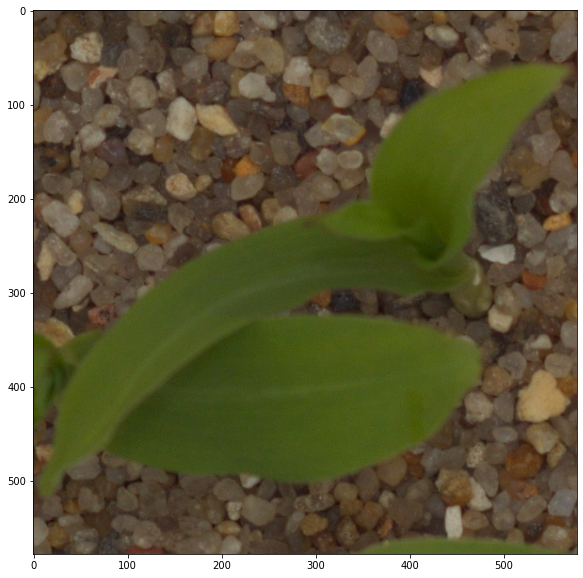

In [ ]:
plt.figure(figsize=(14,10))
plt.imshow(test_image)

>>>***Prediction using the test data from the kaggle source***


>>>*https://www.kaggle.com/c/plant-seedlings-classification/data*

In [ ]:
X_test_resized_3.shape

(794, 45, 45, 3)

In [ ]:
test_data['prediction_CNN_3channel'] = pd.Series(pickled_model.predict_classes(X_test_resized_3)).replace(Replacement)
#updating the prediction of test data to the actual test_data dataframe which already has predictions from best Logistic regression model, 
#Neural netowork and CNN model

In [ ]:
test_data

filename  ... prediction_CNN_3channel
0    /content/drive/My Drive/Data Science/Project 8...  ...        Common Chickweed
1    /content/drive/My Drive/Data Science/Project 8...  ...              Sugar beet
2    /content/drive/My Drive/Data Science/Project 8...  ...              Sugar beet
3    /content/drive/My Drive/Data Science/Project 8...  ...        Common Chickweed
4    /content/drive/My Drive/Data Science/Project 8...  ...              Sugar beet
..                                                 ...  ...                     ...
789  /content/drive/My Drive/Data Science/Project 8...  ...                   Maize
790  /content/drive/My Drive/Data Science/Project 8...  ...       Scentless Mayweed
791  /content/drive/My Drive/Data Science/Project 8...  ...       Scentless Mayweed
792  /content/drive/My Drive/Data Science/Project 8...  ...              Sugar beet
793  /content/drive/My Drive/Data Science/Project 8...  ...                Cleavers

[794 rows x 4 columns]

# **Part 2 TASK:**  

*Explain in depth why CNN out performs neural networks which in turn out perform supervised learning 
models when it comes to image classification. Use the markdown option in Jupiter for your answer.*


1. Why CNN outperforms Neural Networks:
   * **The complexity of the Neural Networks is high** when it comes to handling images. In terms of images we will end up having a lot of input values to process, for eg: if we take a 200x200 sized image, we will actually end up having 40000 units of input values to process. Now, this set of neurons will be connected to a hidden layer which will add up more neurons and multiplication of 40000 units of inputs with any number of hidden layer neurons will make the calculations more difficult. The computations takes more time, requires a lot of higher harware configurations to process.

   *   **Spatial Correlation is local**, when it comes to images we dont have to compare each and every single pixel to come up with a classification,localization etc. As a human being we distinguish an object by looking at its edges, shapes and comapre only the features that are necessary to come up with decision. These issues are tackled by CNN, CNN automatically works on feature extraction through the layer convolution but in terms of neural network we do not have feature extraction and also connect all the neurons, we compute by comparing all the neurons which is not nececssary.

   * Input image that comes into the network can be of any size. If we were to process all the images as per the actual size then we will be wasting a lot of our resources and time. In terms of CNN we have convolutions which breaks the images into multiple feature maps and also reduces the images size which helps in quicker processing


2.   CNN outperforming other Supervised Machine learning models:
   *   Generally an image is in the form of matrix. A color image of RGB type is in the shape of  m x n x 3 which means we will be having 3 channels of m x n matrix. Now a simple ML model works on taking inputs in the form of dataframe which is very straight forward and works on to make prediction as per the algorithms internal formula. Whereas in image we will be having a lot of matrix and ML algorithms will fhave a very tough time in making calculations and coming up with prediction.

   *   Usually majority of supervised ML algorithms (apart from NN and CNN) excepect a linearity. For eg: Logistic regression expects a linearity to seperate classes but interms of image the data is in the form of matrix which means we can have any type of numbers inside and ML algorithm cannot go with linearity to make a prediction.

   * Basic ML algorithms expect a lot of preprocessing on data before creating a model which becomes difficult interms of image  and also they do not capture edges, sharpen images to make a model better understand the features.








# Part 3 - Automobile domain

 Help to build the image dataset to be used by the AI team to build an image classifier data. Import and 
display the images in python against their labels. Comment on the challenges faced during this task.
Hint: An image classifier data requires images as data and their tags/labels/class to which they belong


---



> *Navigating to the shared folder*

In [ ]:
part3_project_path = "/content/drive/My Drive/Data Science/Project 8/Part3/Cars Images/"

In [ ]:
train_data = pd.DataFrame(columns=['filename','class'])
for dirname,j,filenames in os.walk(part3_project_path):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        train_data = train_data.append({'filename':path }, ignore_index = True)

In [ ]:
train_data['filename'].iloc[0].split('/')[-1]

'00011.jpg'

> # **Challenges faced during this task**

---
1. There are no labels provided for any images and hence it is really difficult to identify labels for few images as we are unable to see the logo of few cars

>> Solution: I used google image search the cars names and have labelled all the cars with brand name and also with car name


In [ ]:
Labels = {'00001.jpg':'Audi tt','00002.jpg':'Acura TL','00003.jpg':'Dodge Dakota','00004.jpg':'Hyndai Sonata','00005.jpg':'Ford Super duty',
          '00006.jpg':'convertible','00007.jpg':'Dodge Journey','00008.jpg':'Dodge Charger','00009.jpg':'Mitsubishi lancer',
          '00010.jpg':'Cheverolet Traverse','00011.jpg':'Buick Verano','00012.jpg':'Toyota Sequoia','00013.jpg':'Hyundai Elantra',
          '00014.jpg':'Dodge Caravan','00015.jpg':'Volvo C30'}

In [ ]:
train_data['Car_name'] = train_data['filename'].apply(lambda x: Labels[x.split('/')[-1]])
train_data['class'] = train_data['filename'].apply(lambda x:Labels[x.split('/')[-1]].split(' ')[0] )

In [ ]:
train_data

filename  ...             Car_name
0   /content/drive/My Drive/Data Science/Project 8...  ...         Buick Verano
1   /content/drive/My Drive/Data Science/Project 8...  ...          convertible
2   /content/drive/My Drive/Data Science/Project 8...  ...        Dodge Caravan
3   /content/drive/My Drive/Data Science/Project 8...  ...        Dodge Charger
4   /content/drive/My Drive/Data Science/Project 8...  ...      Ford Super duty
5   /content/drive/My Drive/Data Science/Project 8...  ...        Hyndai Sonata
6   /content/drive/My Drive/Data Science/Project 8...  ...    Mitsubishi lancer
7   /content/drive/My Drive/Data Science/Project 8...  ...      Hyundai Elantra
8   /content/drive/My Drive/Data Science/Project 8...  ...            Volvo C30
9   /content/drive/My Drive/Data Science/Project 8...  ...        Dodge Journey
10  /content/drive/My Drive/Data Science/Project 8...  ...         Dodge Dakota
11  /content/drive/My Drive/Data Science/Project 8...  ...             Acura TL
12  /content/drive/My Drive/Data Science/Project 8...  ...              Audi tt
13  /content/drive/My Drive/Data Science/Project 8...  ...  Cheverolet Traverse
14  /content/drive/My Drive/Data Science/Project 8...  ...       Toyota Sequoia

[15 rows x 3 columns]

In [ ]:
#Alternate approach to fill
# def add_car(x):
#   return Labels[x.split('/')[-1]]
# def add_brand(x):
#   return Labels[x.split('/')[-1]].split(' ')[0]
# train_data['Car_name'] = train_data['filename'].apply(add_car)
# train_data['class'] = train_data['filename'].apply(add_brand)


##  Import and display the images in python against their labels.

The brand name is Buick

The car name is Buick Verano

The image shape is (424, 640, 3)



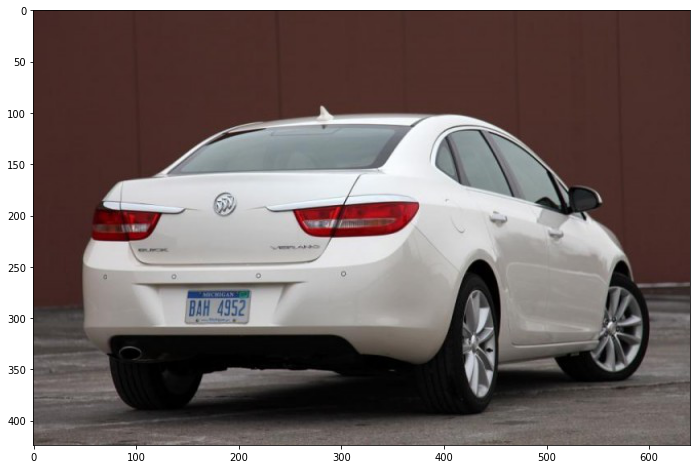

In [ ]:
print("The brand name is "+train_data['class'].iloc[0]+"\n")
print("The car name is "+train_data['Car_name'].iloc[0]+"\n")
image_shape=io.imread(train_data['filename'].iloc[0]).shape
print(f"The image shape is {image_shape}\n")
plt.figure(figsize=(12,8))
plt.imshow(io.imread(train_data['filename'].iloc[0]))

The brand name is Dodge

The car name is Dodge Dakota

The image shape is (480, 640, 3)



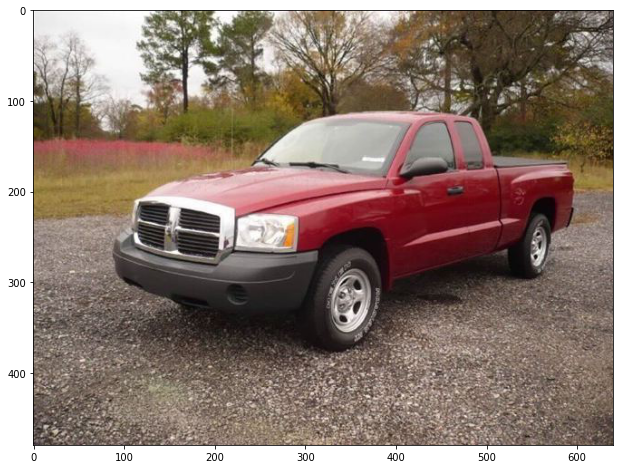

In [ ]:
print("The brand name is "+train_data['class'].iloc[10]+"\n")
print("The car name is "+train_data['Car_name'].iloc[10]+"\n")
image_shape=io.imread(train_data['filename'].iloc[10]).shape
print(f"The image shape is {image_shape}\n")
plt.figure(figsize=(12,8))
plt.imshow(io.imread(train_data['filename'].iloc[10]))

***The image dataset to be used by the AI team to build an image classifier is train_data. It contains the image location and also the labels, this can be used by the teams to create a model. Although the dataset is small, on the larger dataset it will be better***

# Part 4 : Botanical research

## ***1. Import the data. Analyse the dimensions of the data.***

In [ ]:
!pip install tflearn
import tflearn.datasets.oxflower17 as oxflower17
x, y = oxflower17.load_data()

In [ ]:
x.shape
# We have 1360 rows of 3 channel RGB data of dimensions 224 X 224

(1360, 224, 224, 3)

In [ ]:
np.unique(y)
#Total 17 classes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

# **2. Preprocess the data**

In [ ]:
x.max()
#The data looks normalized between 0 and 1

1.0

In [ ]:
x.min()

0.0

In [ ]:
Data = np.zeros((x.shape[0], 50, 50,3))
for i in range(x.shape[0]-1):
  Data[i,:,:] = resize(x[i],(50,50,3))

#Converting the data from 224 X 224 dimensions to 50 X 50 dimension so that we can input it to the model easily

In [ ]:
Data.shape

#All images changed to 50 X 50 dimensions

(1360, 50, 50, 3)

 # 1. **Data visualisation:**

> ## 1.1 Display the images

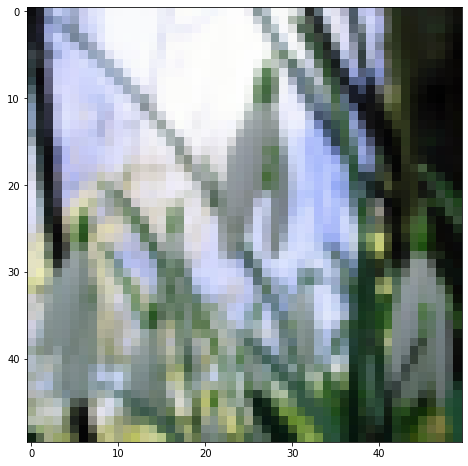

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(Data[0])
#Displaying the resized image

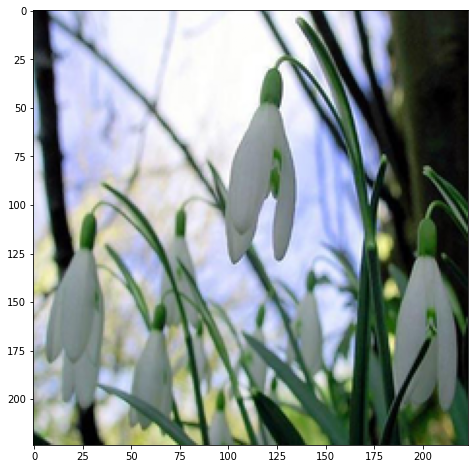

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(x[0])
#Displaying the non-resized image

> ## 1.2 Display the labels

In [ ]:
y[9]

5

In [ ]:
data_dict = {5:'CowSlip', 4:'Dandelion',6:'Buttercup',1:'SnowDrop',2:'Daisy',15:'Fritillary',16:'Sunflower',
             12:'Iris',7:'Windflower',9:'Lilly Valley',13:'Tiger Lilly',3:'Colts Foot',0:'Daffodil',10:'Bluebell',8:'Pansy',
             11:'Crocus',14:'Tulip',}

#Manually picked class names             

> ## 1.3 Display images vs labels


The label for the below image is Windflower




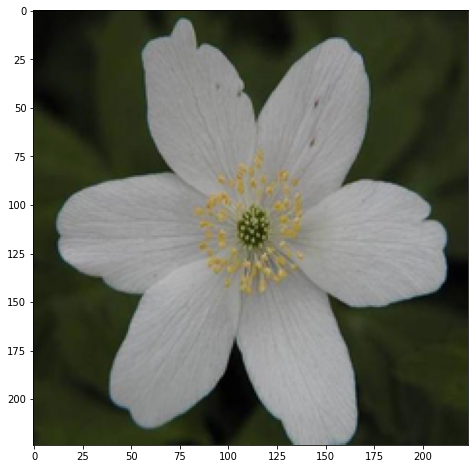

In [ ]:
print(f'The label for the below image is {data_dict[y[570]]}')
print("\n")
plt.figure(figsize=(12,8))
plt.imshow(x[570])
# Display Image Vs Label

The label for the below image is CowSlip




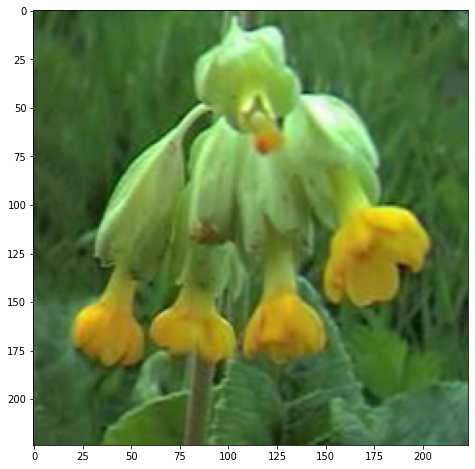

In [ ]:
print(f'The label for the below image is {data_dict[y[870]]}')
print("\n")
plt.figure(figsize=(12,8))
plt.imshow(x[870])
# Display Image Vs Label

> ## 1.4 Apply different filters [ for example: blur, contour, edge detection, emboss, smooth etc.] on the images and display the image.

The label for the below image is CowSlip


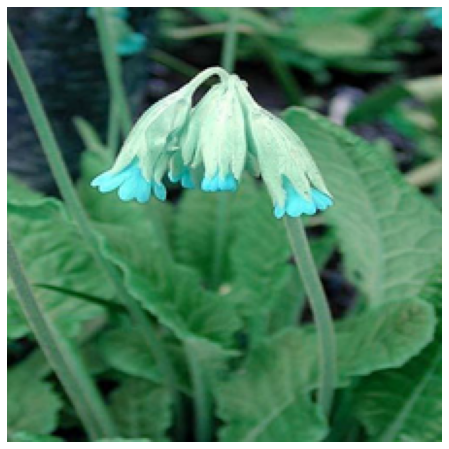

In [ ]:
print(f'The label for the below image is {data_dict[y[9]]}')

loaded_img = x[9]
loaded_img = cv2.cvtColor(loaded_img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(loaded_img)
plt.axis("off")
plt.show()

#Applying filters

## ***Blurred image***

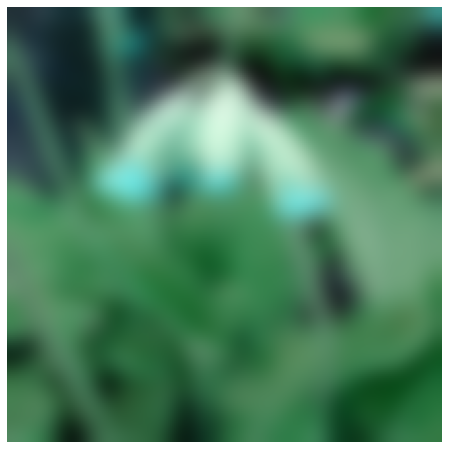

In [ ]:
Blur_Effect_Img = cv2.GaussianBlur(loaded_img, (35, 35), 0)
plt.figure(figsize=(8,8))
plt.imshow(Blur_Effect_Img)
plt.axis("off")
plt.show()

## ***Emboss***

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


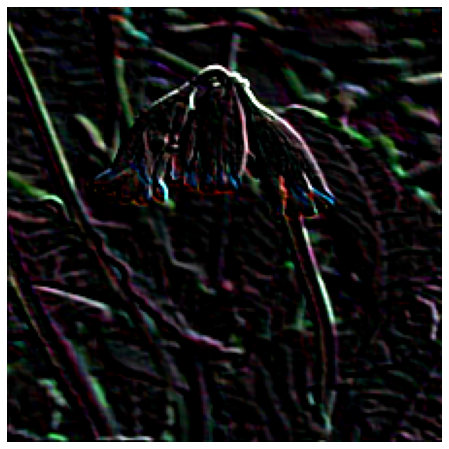

In [ ]:
Emboss_Kernel = np.array([[0,-1,-1],[1,0,-1],[1,1,0]])
Emboss_Effect_Img = cv2.filter2D(src=loaded_img, kernel=Emboss_Kernel, ddepth=-1)
plt.figure(figsize=(8,8))
plt.imshow(Emboss_Effect_Img)
plt.axis("off")
plt.show()

## ***Edge Detection***

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


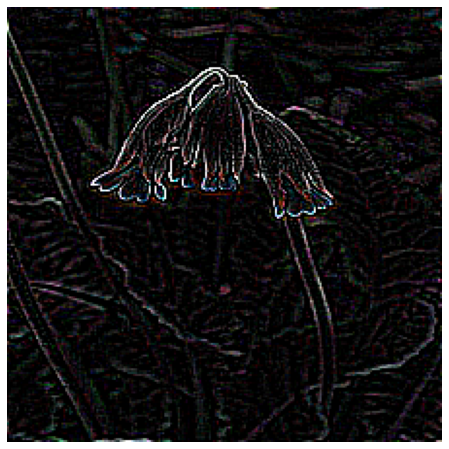

In [ ]:
Edge_Kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
Edge_Effect_Img = cv2.filter2D(src=loaded_img, kernel=Edge_Kernel, ddepth=-1)
plt.figure(figsize=(8,8))
plt.imshow(Edge_Effect_Img)
plt.axis("off")
plt.show()

## ***Stronger Edge Detection***

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


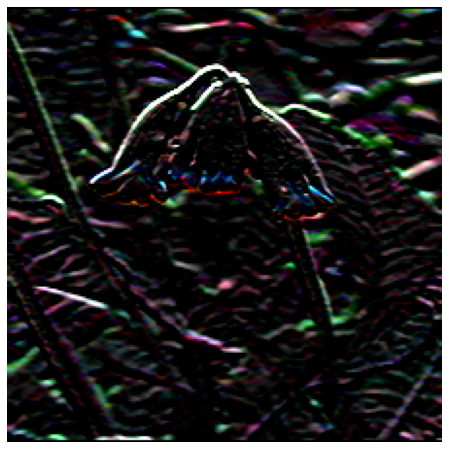

In [ ]:
Stronger_Edge_Kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
Stronger_Edge_Effect_Img = cv2.filter2D(src=loaded_img, kernel=Stronger_Edge_Kernel, ddepth=-1)
plt.figure(figsize=(8,8))
plt.imshow(Stronger_Edge_Effect_Img)
plt.axis("off")
plt.show()

# ***Sharpening Effect***

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


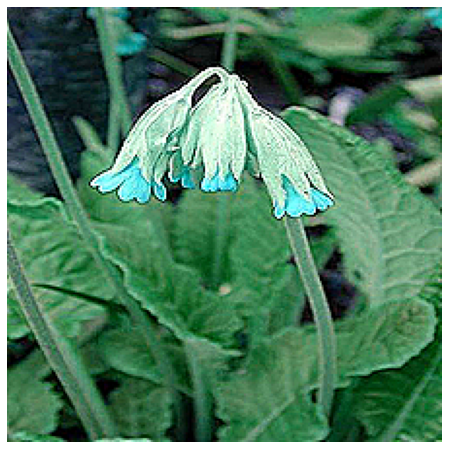

In [ ]:
sharpening_Kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
Sharpening_Effect_Img = cv2.filter2D(src=loaded_img, kernel=sharpening_Kernel, ddepth=-1)
plt.figure(figsize=(8,8))
plt.imshow(Sharpening_Effect_Img)
plt.axis("off")
plt.show()

# **Train tune and test AIML image classifier model using:**
>> • Use supervised learning algorithms for training - We use the Logistic Regression model but we get a bad prediction accuracy. (dropping this model as it gives only 47% accuracy)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Data, y, test_size=0.3)
X_train = X_train.reshape(X_train.shape[0],7500)
X_test = X_test.reshape(X_test.shape[0],7500)

In [ ]:
# We will try simple Logistic Regression algorithm
LG2 = LogisticRegression()
LG2.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred = LG2. predict(X_test)
lg_df = pd.DataFrame(pred,columns=['Predicted'])
lg_df['Actual'] = y_test

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.26      0.27      0.27        22
           1       0.35      0.35      0.35        23
           2       0.59      0.66      0.62        29
           3       0.47      0.33      0.39        24
           4       0.38      0.46      0.42        24
           5       0.33      0.29      0.31        24
           6       0.21      0.35      0.27        17
           7       0.54      0.50      0.52        26
           8       0.64      0.56      0.60        16
           9       0.42      0.45      0.43        22
          10       0.55      0.63      0.59        27
          11       0.46      0.41      0.43        27
          12       0.65      0.71      0.68        28
          13       0.82      0.50      0.62        28
          14       0.19      0.15      0.17        26
          15       0.22      0.35      0.27        17
          16       0.95      0.75      0.84        28

    accuracy              

In [ ]:
LG2.score(X_train,y_train)

0.9989495798319328

In [ ]:
LG2.score(X_test,y_test)
#Highly overfitted

0.46568627450980393


>> • Use neural networks for training - **All the models overfit**


---

We dont apply any hyperparameter tunning since the images work really well on CNN. We try to create 3 models with different optimizers to see if they perform well

Hyperparameters of Neural networks:

- Number of layers
- Number of neurons
- Dropout layers
- Batch normalization
- Types of optimizers and their hyperparameters
- Different weight initialization techniques
- Trying different Delta value, patience value and metric in Early stopping


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
#Converting them to one hot encoded vector

In [ ]:
model3 = Sequential()
model3.add(Dense(6000,activation='relu',input_shape=(7500,)))
model3.add(Dense(3000,activation='relu'))
model3.add(Dense(1500,activation='relu'))
model3.add(Dense(700,activation='relu'))
model3.add(Dense(350,activation='relu'))
model3.add(Dense(150,activation='relu'))
model3.add(Dense(70,activation='relu'))
model3.add(Dense(17,activation='softmax'))

In [ ]:
ES = EarlyStopping(monitor='val_accuracy',min_delta=0.1,mode='max',patience=15)
model3.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
model3.fit(X_train,y_train,epochs=100,callbacks=[ES],validation_data=(X_test,y_test),batch_size=100)

#Adam optimizer with default parameters - Overfitted with 46.32% accuracy

Train on 952 samples, validate on 408 samples
Epoch 1/100
952/952 [==============================] - 0s 465us/sample - loss: 2.4796 - acc: 0.2027 - val_loss: 2.3288 - val_acc: 0.2059
Epoch 2/100
952/952 [==============================] - 0s 302us/sample - loss: 2.1204 - acc: 0.2647 - val_loss: 2.2599 - val_acc: 0.2083
Epoch 3/100
952/952 [==============================] - 0s 303us/sample - loss: 1.9338 - acc: 0.2826 - val_loss: 2.0555 - val_acc: 0.2598
Epoch 4/100
952/952 [==============================] - 0s 290us/sample - loss: 1.8468 - acc: 0.3309 - val_loss: 2.0186 - val_acc: 0.2990
Epoch 5/100
952/952 [==============================] - 0s 300us/sample - loss: 1.7861 - acc: 0.3529 - val_loss: 1.9747 - val_acc: 0.2966
Epoch 6/100
952/952 [==============================] - 0s 293us/sample - loss: 1.6554 - acc: 0.3929 - val_loss: 2.0842 - val_acc: 0.2794
Epoch 7/100
952/952 [==============================] - 0s 291us/sample - loss: 1.7295 - acc: 0.3487 - val_loss: 1.9593 - val_acc: 0.

In [ ]:
ES = EarlyStopping(monitor='val_accuracy',min_delta=0.1,mode='max',patience=15)
sgd = optimizers.SGD(learning_rate=0.01,momentum=0.01,nesterov=True)
model3.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=sgd)
model3.fit(X_train,y_train,epochs=100,callbacks=[ES],validation_data=(X_test,y_test),batch_size=100)

#Stochastic Gradient Descent optimizer with few corrections on SGD hyperparameters - Overfitting model but with accuracy of 49.26%

Train on 952 samples, validate on 408 samples
Epoch 1/100
952/952 [==============================] - 0s 460us/sample - loss: 0.0028 - acc: 1.0000 - val_loss: 5.3023 - val_acc: 0.4902
Epoch 2/100
952/952 [==============================] - 0s 290us/sample - loss: 0.0028 - acc: 1.0000 - val_loss: 5.3114 - val_acc: 0.4902
Epoch 3/100
952/952 [==============================] - 0s 267us/sample - loss: 0.0027 - acc: 1.0000 - val_loss: 5.3158 - val_acc: 0.4902
Epoch 4/100
952/952 [==============================] - 0s 277us/sample - loss: 0.0027 - acc: 1.0000 - val_loss: 5.3246 - val_acc: 0.4902
Epoch 5/100
952/952 [==============================] - 0s 282us/sample - loss: 0.0027 - acc: 1.0000 - val_loss: 5.3315 - val_acc: 0.4902
Epoch 6/100
952/952 [==============================] - 0s 274us/sample - loss: 0.0027 - acc: 1.0000 - val_loss: 5.3361 - val_acc: 0.4902
Epoch 7/100
952/952 [==============================] - 0s 280us/sample - loss: 0.0026 - acc: 1.0000 - val_loss: 5.3402 - val_acc: 0.

In [ ]:
ES = EarlyStopping(monitor='val_accuracy',min_delta=0.1,mode='max',patience=15)
rms = optimizers.RMSprop(learning_rate=0.01,momentum=0.01)
model3.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=rms)
model3.fit(X_train,y_train,epochs=100,callbacks=[ES],validation_data=(X_test,y_test),batch_size=100)

#RMS prop optimizer with default parameters - Bad model

Train on 952 samples, validate on 408 samples
Epoch 1/100
952/952 [==============================] - 0s 515us/sample - loss: 1194.4963 - acc: 0.1754 - val_loss: 3.3970 - val_acc: 0.0564
Epoch 2/100
952/952 [==============================] - 0s 321us/sample - loss: 4.9005 - acc: 0.0735 - val_loss: 2.8069 - val_acc: 0.0833
Epoch 3/100
952/952 [==============================] - 0s 318us/sample - loss: 2.7129 - acc: 0.1124 - val_loss: 3.4539 - val_acc: 0.0882
Epoch 4/100
952/952 [==============================] - 0s 326us/sample - loss: 2.8272 - acc: 0.1313 - val_loss: 2.8757 - val_acc: 0.0784
Epoch 5/100
952/952 [==============================] - 0s 320us/sample - loss: 3.1191 - acc: 0.1355 - val_loss: 2.8668 - val_acc: 0.0956
Epoch 6/100
952/952 [==============================] - 0s 315us/sample - loss: 2.8133 - acc: 0.0872 - val_loss: 2.6436 - val_acc: 0.1495
Epoch 7/100
952/952 [==============================] - 0s 318us/sample - loss: 2.7313 - acc: 0.1155 - val_loss: 2.8165 - val_acc:

• Use CNN for training

In [ ]:
X_train = X_train.reshape(X_train.shape[0],50,50,3)
X_test = X_test.reshape(X_test.shape[0],50,50,3)

#reshaping the data

In [ ]:
#SGD optimizer model gives 99.3% of training accuracy and 58.58% validation accuracy

model_cnn_sgd1 = Sequential()
model_cnn_sgd1.add(Conv2D(filters=55,kernel_size=3,activation='relu',input_shape=(50,50,3,)))
model_cnn_sgd1.add(Dropout(0.2))
model_cnn_sgd1.add(Conv2D(filters=62,kernel_size=3,activation='relu'))
model_cnn_sgd1.add(Dropout(0.2))
model_cnn_sgd1.add(MaxPool2D(pool_size=(2, 2))) #,strides=2
model_cnn_sgd1.add(Flatten())
model_cnn_sgd1.add(Dense(100,activation='relu'))
model_cnn_sgd1.add(Dropout(0.2))
model_cnn_sgd1.add(Dense(80,activation='relu'))
model_cnn_sgd1.add(Dropout(0.2))
model_cnn_sgd1.add(Dense(40,activation='relu'))
model_cnn_sgd1.add(Dropout(0.2))
model_cnn_sgd1.add(Dense(17,activation='softmax'))
ES = EarlyStopping(monitor='val_accuracy',min_delta=0.01,mode='max',patience=25)
sgd = optimizers.SGD(learning_rate=0.01,momentum=0.01,nesterov=True)
model_cnn_sgd1.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=sgd)
model_cnn_sgd1.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),callbacks=[ES])

Train on 952 samples, validate on 408 samples
Epoch 1/500
952/952 [==============================] - 29s 30ms/sample - loss: 2.8339 - acc: 0.0693 - val_loss: 2.8289 - val_acc: 0.0539
Epoch 2/500
952/952 [==============================] - 0s 475us/sample - loss: 2.8124 - acc: 0.0798 - val_loss: 2.8123 - val_acc: 0.0907
Epoch 3/500
952/952 [==============================] - 0s 468us/sample - loss: 2.7852 - acc: 0.0830 - val_loss: 2.8001 - val_acc: 0.1127
Epoch 4/500
952/952 [==============================] - 0s 467us/sample - loss: 2.7712 - acc: 0.1071 - val_loss: 2.7592 - val_acc: 0.1397
Epoch 5/500
952/952 [==============================] - 0s 468us/sample - loss: 2.7257 - acc: 0.1261 - val_loss: 2.7339 - val_acc: 0.1642
Epoch 6/500
952/952 [==============================] - 0s 482us/sample - loss: 2.6603 - acc: 0.1471 - val_loss: 2.6632 - val_acc: 0.1593
Epoch 7/500
952/952 [==============================] - 0s 464us/sample - loss: 2.6253 - acc: 0.1607 - val_loss: 2.6338 - val_acc: 0.

In [ ]:
#Adam optimizer model gives 99.05% of training accuracy and 52.21% validation accuracy
model_cnn_adam = Sequential()
model_cnn_adam.add(Conv2D(filters=45,kernel_size=3,activation='relu',input_shape=(50,50,3,)))
model_cnn_adam.add(Dropout(0.2))
model_cnn_adam.add(Conv2D(filters=62,kernel_size=3,activation='relu'))
model_cnn_adam.add(Dropout(0.2))
model_cnn_adam.add(MaxPool2D(pool_size=(2, 2))) #,strides=2
model_cnn_adam.add(Flatten())
model_cnn_adam.add(Dense(80,activation='relu'))
model_cnn_adam.add(Dropout(0.4))
model_cnn_adam.add(Dense(40,activation='relu'))
model_cnn_adam.add(Dense(17,activation='softmax'))
ES = EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=15)
adam = optimizers.Adam(learning_rate=0.001,decay=1e-6)
model_cnn_adam.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=adam)
model_cnn_adam.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),callbacks=[ES])

Train on 952 samples, validate on 408 samples
Epoch 1/500
952/952 [==============================] - 1s 1ms/sample - loss: 2.8035 - acc: 0.0830 - val_loss: 2.6136 - val_acc: 0.1103
Epoch 2/500
952/952 [==============================] - 0s 481us/sample - loss: 2.5356 - acc: 0.1387 - val_loss: 2.4738 - val_acc: 0.2328
Epoch 3/500
952/952 [==============================] - 0s 477us/sample - loss: 2.2499 - acc: 0.2384 - val_loss: 2.2001 - val_acc: 0.2549
Epoch 4/500
952/952 [==============================] - 0s 487us/sample - loss: 2.0505 - acc: 0.3151 - val_loss: 2.0540 - val_acc: 0.3578
Epoch 5/500
952/952 [==============================] - 0s 475us/sample - loss: 1.8339 - acc: 0.3655 - val_loss: 1.8208 - val_acc: 0.4044
Epoch 6/500
952/952 [==============================] - 0s 484us/sample - loss: 1.5563 - acc: 0.4769 - val_loss: 1.6353 - val_acc: 0.4706
Epoch 7/500
952/952 [==============================] - 0s 479us/sample - loss: 1.5246 - acc: 0.4653 - val_loss: 1.5551 - val_acc: 0.49

In [ ]:
# RMSprop optimizer gives a very bad accuracy - Very bad model
model_cnn_rms1 = Sequential()
model_cnn_rms1.add(Conv2D(filters=45,kernel_size=3,activation='relu',input_shape=(50,50,3,)))
model_cnn_rms1.add(Dropout(0.2))
model_cnn_rms1.add(Conv2D(filters=62,kernel_size=3,activation='relu'))
model_cnn_rms1.add(Dropout(0.2))
model_cnn_rms1.add(MaxPool2D(pool_size=(2, 2))) #,strides=2
model_cnn_rms1.add(Flatten())
model_cnn_rms1.add(Dense(80,activation='relu'))
model_cnn_rms1.add(Dropout(0.2))
model_cnn_rms1.add(Dense(40,activation='relu'))
model_cnn_rms1.add(Dense(17,activation='softmax'))
ES = EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=15)
rms = optimizers.RMSprop(learning_rate=0.01,momentum=0.01)
model_cnn_rms1.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=rms)
model_cnn_rms1.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),callbacks=[ES])

Train on 952 samples, validate on 408 samples
Epoch 1/100
952/952 [==============================] - 1s 811us/sample - loss: 15.7854 - acc: 0.0630 - val_loss: 2.8386 - val_acc: 0.0441
Epoch 2/100
952/952 [==============================] - 0s 479us/sample - loss: 2.8352 - acc: 0.0578 - val_loss: 2.8481 - val_acc: 0.0392
Epoch 3/100
952/952 [==============================] - 0s 487us/sample - loss: 2.8344 - acc: 0.0630 - val_loss: 2.8522 - val_acc: 0.0392
Epoch 4/100
952/952 [==============================] - 0s 477us/sample - loss: 2.8336 - acc: 0.0693 - val_loss: 2.8566 - val_acc: 0.0392
Epoch 5/100
952/952 [==============================] - 0s 485us/sample - loss: 2.8341 - acc: 0.0683 - val_loss: 2.8582 - val_acc: 0.0392
Epoch 6/100
952/952 [==============================] - 0s 484us/sample - loss: 2.8442 - acc: 0.0578 - val_loss: 2.8529 - val_acc: 0.0392
Epoch 7/100
952/952 [==============================] - 0s 494us/sample - loss: 2.8335 - acc: 0.0588 - val_loss: 2.8542 - val_acc: 0

# ***Out of the above mentioned 3 CNN models with 3 different optimizers, we try to further edit the SGD optimizer model to get better results***

In [ ]:
#We will pass the complete dataset in the actual dimensions
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
#SGD optimizer model gives 99.3% of training accuracy and 58.58% validation accuracy, we try adding more layers - Still not a good model

model_cnn_sgd1 = Sequential()
model_cnn_sgd1.add(Conv2D(filters=55,kernel_size=3,activation='relu',input_shape=(224,224,3,)))
model_cnn_sgd1.add(Dropout(0.2))
model_cnn_sgd1.add(Conv2D(filters=62,kernel_size=3,activation='relu'))
model_cnn_sgd1.add(Dropout(0.2))
model_cnn_sgd1.add(MaxPool2D(pool_size=(2, 2))) #,strides=2
model_cnn_sgd1.add(Conv2D(filters=55,kernel_size=3,activation='relu',input_shape=(224,224,3,)))
model_cnn_sgd1.add(Dropout(0.2))
model_cnn_sgd1.add(Conv2D(filters=62,kernel_size=3,activation='relu'))
model_cnn_sgd1.add(Dropout(0.2))
model_cnn_sgd1.add(MaxPool2D(pool_size=(2, 2))) #,strides=2
model_cnn_sgd1.add(Flatten())
model_cnn_sgd1.add(Dense(100,activation='relu'))
model_cnn_sgd1.add(Dropout(0.2))
model_cnn_sgd1.add(Dense(80,activation='relu'))
model_cnn_sgd1.add(Dropout(0.2))
model_cnn_sgd1.add(Dense(40,activation='relu'))
model_cnn_sgd1.add(Dropout(0.2))
model_cnn_sgd1.add(Dense(17,activation='softmax'))
ES = EarlyStopping(monitor='val_accuracy',min_delta=0.01,mode='max',patience=25)
sgd = optimizers.SGD(learning_rate=0.01,momentum=0.1,nesterov=True)
model_cnn_sgd1.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=sgd)
model_cnn_sgd1.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),callbacks=[ES])

Train on 952 samples, validate on 408 samples
Epoch 1/100
952/952 [==============================] - 8s 9ms/sample - loss: 2.8379 - acc: 0.0683 - val_loss: 2.8284 - val_acc: 0.0588
Epoch 2/100
952/952 [==============================] - 8s 8ms/sample - loss: 2.8195 - acc: 0.0788 - val_loss: 2.8232 - val_acc: 0.1029
Epoch 3/100
952/952 [==============================] - 8s 8ms/sample - loss: 2.7962 - acc: 0.0935 - val_loss: 2.8045 - val_acc: 0.1642
Epoch 4/100
952/952 [==============================] - 8s 8ms/sample - loss: 2.7529 - acc: 0.1113 - val_loss: 2.7809 - val_acc: 0.1716
Epoch 5/100
952/952 [==============================] - 8s 8ms/sample - loss: 2.6928 - acc: 0.1502 - val_loss: 2.7119 - val_acc: 0.1912
Epoch 6/100
952/952 [==============================] - 8s 8ms/sample - loss: 2.5800 - acc: 0.1859 - val_loss: 2.6348 - val_acc: 0.2034
Epoch 7/100
952/952 [==============================] - 8s 8ms/sample - loss: 2.5284 - acc: 0.2017 - val_loss: 2.5781 - val_acc: 0.2230
Epoch 8/1

# *Use various CNN with transferred learning models for training*

**We will be trying Resnet_v2_152, Resnet_v2_50, Mobilenet_v2_130_224**



1.   We will use resnet_v2_152 (https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/5)

    * The expected size of the input images is height x width = 224 x 224 
pixels by default
    * The actual image size is 224 x 224 x 3 , hence we can directly pass the images to the model
    * This model gives 97.27% of Training Accuracy and 91.91% Test Accuracy. We dont try to fine tune the model here since there is very little data and it is similar dataset trained module **Resnet**. 
    * We try to apply few NN layers and a Softmax layer in the end.
    * We will continue to use the SGD optimizer with same hyperparameters as it works the best in finding a good global minima in this case.


In [ ]:
model_res_net_152 = Sequential([hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/5",trainable=False)])
model_res_net_152.add(Dense(100,activation='relu'))
model_res_net_152.add(Dropout(0.2))
model_res_net_152.add(Dense(80,activation='relu'))
model_res_net_152.add(Dropout(0.2))
model_res_net_152.add(Dense(40,activation='relu'))
model_res_net_152.add(Dropout(0.2))
model_res_net_152.add(Dense(17,activation='softmax'))
ES = EarlyStopping(monitor='val_acc',min_delta=0.01,mode='max',patience=25)
sgd = optimizers.SGD(learning_rate=0.01,momentum=0.1,nesterov=True)
model_res_net_152.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=sgd)
model_res_net_152.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),callbacks=[ES])

Train on 952 samples, validate on 408 samples
Epoch 1/100
952/952 [==============================] - 22s 23ms/sample - loss: 2.7094 - acc: 0.1513 - val_loss: 2.4359 - val_acc: 0.3088
Epoch 2/100
952/952 [==============================] - 15s 15ms/sample - loss: 2.4111 - acc: 0.2658 - val_loss: 2.1445 - val_acc: 0.4093
Epoch 3/100
952/952 [==============================] - 15s 15ms/sample - loss: 2.2232 - acc: 0.3120 - val_loss: 1.9121 - val_acc: 0.5123
Epoch 4/100
952/952 [==============================] - 15s 16ms/sample - loss: 2.0530 - acc: 0.3582 - val_loss: 1.6811 - val_acc: 0.5637
Epoch 5/100
952/952 [==============================] - 15s 16ms/sample - loss: 1.8451 - acc: 0.4254 - val_loss: 1.4769 - val_acc: 0.6176
Epoch 6/100
952/952 [==============================] - 15s 16ms/sample - loss: 1.7046 - acc: 0.4685 - val_loss: 1.3393 - val_acc: 0.6593
Epoch 7/100
952/952 [==============================] - 15s 15ms/sample - loss: 1.5314 - acc: 0.5116 - val_loss: 1.1975 - val_acc: 0.

In [ ]:
# Pickle the model
model_res_net_152.save('/content/drive/My Drive/Raghav_model/model_res_net_152.h5')

Mounted at /content/drive/


2.   We will use resnet_v2_50 (https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5)

    * We will not fine tune the model top layer (conv layers) as per transfer learning rule of thumb .
    * We get a very good accuracy of 94.01% train data and 92.89% in test data (slightly overfitting).
    * The expected size of the input images is height x width = 224 x 224 
pixels by default
    * The actual image size is 224 x 224 x 3 , hence we can directly pass the images to the model
    * We will continue to use the SGD optimizer with same hyperparameters

In [ ]:
model_res_net_50 = Sequential([hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5",trainable=False)])
model_res_net_50.add(Dense(100,activation='relu'))
model_res_net_50.add(Dropout(0.2))
model_res_net_50.add(Dense(80,activation='relu'))
model_res_net_50.add(Dropout(0.2))
model_res_net_50.add(Dense(40,activation='relu'))
model_res_net_50.add(Dropout(0.2))
model_res_net_50.add(Dense(17,activation='softmax'))
ES = EarlyStopping(monitor='val_acc',min_delta=0.01,mode='max',patience=25)
sgd = optimizers.SGD(learning_rate=0.01,momentum=0.1,nesterov=True)
model_res_net_50.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=sgd)
model_res_net_50.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),callbacks=[ES])

Train on 952 samples, validate on 408 samples
Epoch 1/50
952/952 [==============================] - 9s 9ms/sample - loss: 2.8199 - acc: 0.1071 - val_loss: 2.5646 - val_acc: 0.2181
Epoch 2/50
952/952 [==============================] - 6s 6ms/sample - loss: 2.5338 - acc: 0.1733 - val_loss: 2.3031 - val_acc: 0.3407
Epoch 3/50
952/952 [==============================] - 6s 6ms/sample - loss: 2.3019 - acc: 0.2700 - val_loss: 2.0391 - val_acc: 0.4657
Epoch 4/50
952/952 [==============================] - 6s 6ms/sample - loss: 2.1218 - acc: 0.3288 - val_loss: 1.7738 - val_acc: 0.5441
Epoch 5/50
952/952 [==============================] - 6s 6ms/sample - loss: 1.8651 - acc: 0.4128 - val_loss: 1.5906 - val_acc: 0.5760
Epoch 6/50
952/952 [==============================] - 6s 6ms/sample - loss: 1.7231 - acc: 0.4496 - val_loss: 1.3626 - val_acc: 0.7010
Epoch 7/50
952/952 [==============================] - 6s 7ms/sample - loss: 1.5516 - acc: 0.5158 - val_loss: 1.1996 - val_acc: 0.7255
Epoch 8/50
952/9

In [ ]:
# Pickle the model
model_res_net_50.save('/content/drive/My Drive/Raghav_model/model_res_net_50.h5')

3.   We will use mobilenet_v2_130_224 (https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/5)

    * We will not fine tune the layers.
    * In this model we get 93.49% accuracy on training data and 93.63% accuracy in test data
    * The expected size of the input images is height x width = 224 x 224 
pixels by default
    * The actual image size is 224 x 224 x 3 , hence we can directly pass the images to the model
    * We will continue to use the SGD optimizer with same hyperparameters

In [ ]:
mobilenet_v2_130_224 = Sequential([hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/5",trainable=False)])
mobilenet_v2_130_224.add(Dense(100,activation='relu'))
mobilenet_v2_130_224.add(Dropout(0.2))
mobilenet_v2_130_224.add(Dense(80,activation='relu'))
mobilenet_v2_130_224.add(Dropout(0.2))
mobilenet_v2_130_224.add(Dense(40,activation='relu'))
mobilenet_v2_130_224.add(Dropout(0.2))
mobilenet_v2_130_224.add(Dense(17,activation='softmax'))
ES = EarlyStopping(monitor='val_acc',min_delta=0.001,mode='max',patience=10)
sgd = optimizers.SGD(learning_rate=0.01,momentum=0.1,nesterov=True)
mobilenet_v2_130_224.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=sgd)
mobilenet_v2_130_224.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),callbacks=[ES])

Train on 952 samples, validate on 408 samples
Epoch 1/50
952/952 [==============================] - 7s 7ms/sample - loss: 2.8352 - acc: 0.0798 - val_loss: 2.6630 - val_acc: 0.1838
Epoch 2/50
952/952 [==============================] - 4s 4ms/sample - loss: 2.6394 - acc: 0.1639 - val_loss: 2.4536 - val_acc: 0.3407
Epoch 3/50
952/952 [==============================] - 4s 4ms/sample - loss: 2.4717 - acc: 0.2248 - val_loss: 2.2028 - val_acc: 0.4730
Epoch 4/50
952/952 [==============================] - 4s 4ms/sample - loss: 2.2559 - acc: 0.3067 - val_loss: 1.9665 - val_acc: 0.5980
Epoch 5/50
952/952 [==============================] - 4s 4ms/sample - loss: 2.0416 - acc: 0.3771 - val_loss: 1.6891 - val_acc: 0.6569
Epoch 6/50
952/952 [==============================] - 4s 4ms/sample - loss: 1.8700 - acc: 0.4212 - val_loss: 1.4675 - val_acc: 0.7328
Epoch 7/50
952/952 [==============================] - 4s 4ms/sample - loss: 1.6973 - acc: 0.4611 - val_loss: 1.2722 - val_acc: 0.7402
Epoch 8/50
952/9

In [ ]:
# Pickle the model
mobilenet_v2_130_224.save('/content/drive/My Drive/Data Science/Project 8/Part 4/mobilenet_v2_130_224.h5')

In [ ]:
from tensorflow.keras.applications import MobileNet
model11 = MobileNet(include_top=False)

In [ ]:
for l in model11.layers:
  l.trainable=False

model = tf.keras.Sequential([
  model11,
  tf.keras.layers.Dense(6, activation='softmax')
])

In [ ]:
ES = EarlyStopping(monitor='val_acc',min_delta=0.001,mode='max',patience=10)
sgd = optimizers.SGD(learning_rate=0.01,momentum=0.1,nesterov=True)



In [ ]:

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=sgd)
model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),callbacks=[ES])
# newmodel.summary()

ValueError: ignored

In [ ]:
pred = mobilenet_v2_130_224.predict_classes(X_test)
ddff = pd.DataFrame(pred,columns=['Prediction'])
test_data = pd.Series([np.argmax(i) for i in y_test])
ddff['Actual'] = test_data

In [ ]:
print(classification_report(pred,test_data))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.89      0.86      0.87        28
           2       0.96      1.00      0.98        27
           3       0.97      1.00      0.98        31
           4       1.00      0.96      0.98        24
           5       0.96      0.96      0.96        24
           6       0.94      1.00      0.97        16
           7       1.00      1.00      1.00        26
           8       0.96      0.96      0.96        26
           9       1.00      0.92      0.96        24
          10       0.96      0.92      0.94        26
          11       1.00      0.87      0.93        23
          12       0.91      1.00      0.95        21
          13       0.96      1.00      0.98        27
          14       1.00      0.96      0.98        25
          15       0.89      1.00      0.94        16
          16       1.00      1.00      1.00        26

    accuracy              

# **Compare the results from the above step along with your detailed observations.**


1.   Initially we tried using **Logistic regression** model which gave **99.89% of accuracy in training** and **46.56% of accuracy in test data**. This was an overfitting model and also had a very bad metrics for test data, we will not be able to proceed with this model
2.   We tried using **Neural Network  with sgd optimizer, learning_rate=0.01,momentum=0.01 and nesterov=True**, we managed to get **100% training accuracy** and **49.26% of validation accuracy**. The model is completely overfitting and has a very bad validation accuracy accuracy.
3. Later we tried using **CNN** with the same **SGD optimizer** and its hyperparameter metrics to get **99.37% of training accuracy & 58.58% of validation accuracy**
4. Finally applied the transfer learning technique by using **Resnet_v2_152, Resnet_v2_50 and Mobilenet_v2_130_224** models and ended up getting **96.53% of training accuracy and 96.57% of validation accuracy**

> I dint tune the Logit, Neural network and CNN models as they would not be generating a good prediction. My focus was mostly to identify the best optimizer that shall help in getting the model to global minima and then apply the best pretrained model by using transfer learning principles.


---


Out of these we will choose the best model with highest validation accuracy that is **Mobilenet_v2_130_224**



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
path = '/content/drive/My Drive/Data Science/Project 8/Part 4/'
model = load_model(path + 'mobilenet_v2_130_224.h5',custom_objects={'KerasLayer': hub.KerasLayer})

#since we have used tensorflowhub as a layer but not imported from tensorflow.keras... we will have to mention that in custom objects to have it 
#loaded without any error

Mounted at /content/drive/


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 1001)              5432713   
_________________________________________________________________
dense_8 (Dense)              (None, 100)               100200    
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 80)                8080      
_________________________________________________________________
dropout_7 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 40)                3240      
_________________________________________________________________
dropout_8 (Dropout)          (None, 40)               

**Doing a prediction on "prediction-flower.jpg" using the pickled model**

The image shape is (224, 224, 3)




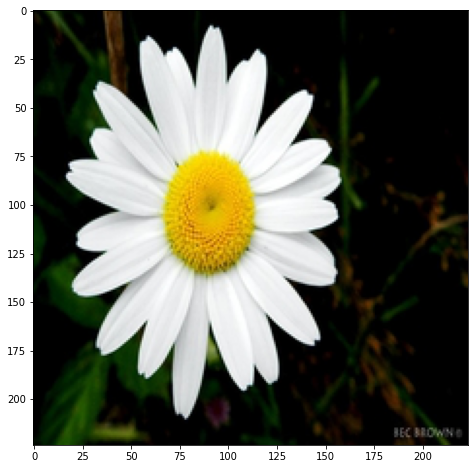

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/')
image = io.imread('/content/drive/My Drive/Data Science/Project 8/Part 4/Prediction_flower/Prediction - Flower.jpg')
print(f"The image shape is {image.shape}")
print("\n")
plt.figure(figsize=(12,8))
plt.imshow(image)

In [ ]:

# Reshaping the image to apply on model
prediction = model.predict_classes(image.reshape(1,224,224,3))
data_dict[prediction[0]]

'Daisy'

In [ ]:
print(tf.__version__)

2.5.0


# **Create a GUI to import the image “Prediction.jpg” and use the above designed AIML image classification model to predict the class/label of this image.**

In [ ]:
from PIL import Image,ImageTk
from tkinter import filedialog
import tkinter as tk

#Setting the canvas
window = tk.Tk()
window.title("Classfier GUI")
canvas = tk.Canvas(window, width=800, height=50,borderwidth=2)
canvas.grid(columnspan=3, rowspan=30)


# Labels and buttons
lb1 = tk.Label(window, text="Upload file")
lb1.grid(column=0, row=5)
entry1 = tk.Button(window,width=20, text ='Click here to load image!!', command = lambda:open_file())
entry1.grid(column=1, row=5)
entry2 = tk.Button(window,text='Import Data',width=27,command=lambda:load_file())
entry2.grid(column=2, row=5)
entry3 = tk.Button(window,text='Predict',width=27,command=lambda:predict())
entry3.grid(column=1, row=6)
lb1 = tk.Label(window, text="Result here!!")
lb1.grid(column=2, row=6)

#The function that will predict the class number, we will use data_dict to pick the class name and display it in entry4
def predict():
    x = model.predict_classes(file1.reshape(1,224,224,3))
    entry4.configure(data_dict[x])

#Once the file is loaded successfully, we will display a message
def load_file():
    if file1.any:
        entry2.configure(text='File loaded successfully!!!')
    else:
        entry2.configure(text='File not loaded, recheck')

#Loading the image and converting it into Numpyarray to be passed to the model
def open_file():
    global file1
    file = filedialog.askopenfile(mode='r')
    file1 = np.array(Image.open(file.name))  

window.mainloop()    

# ***Part 5: Explain in depth your strategy to maintain and support the AIML image classifier after it in production.***


---




1.   Any model thats pickled cannot be used as the final model for a long period of time as the amount of data that we receive everyday will be a lot, there is always a room for improvement. We might be getting a lot more inputs which can be used to retrain the model. To explain this in detail, the current model we have deployed might be the right option for current data but in future if we are able to collect few **more inputs** or **more features** then we might have to retrain the model to get better prediction. We can also try applying transfer learning techniques with new models.


2.   The second option is to gather feedbacks from the users and cross verify with our predictions. This could help in understanding how well our model performs in production and also helps in tuning the model to get better accuracy. Adding to that we will alsi get to know if the model shall stay in  productions or needs to be updated with newer model.

3. Apply data augmentation with new data, try out various other transfer learning networks to get the best model out. We must also work on making the model efficient, make it to produce quicker results so that the end users have less latency.

4.  How often we needed to validate the model depends on the frequency of model consumption and the rate at which the data changes over time. Understanding the business problem will also help to determine the frequency of validating the model.

5. If there are new additions to the model (additional classes), then we will have to make sure that all the classes are equally balanced and the model is well trained to predict all the class without issues. As mentioned in point 3 we can apply data augmentation to add in more training data. 


**I wanted to keep you informed that i couldn't run the model since my GPU was getting disconnected, this led to the delay in submission.**

# Thanks

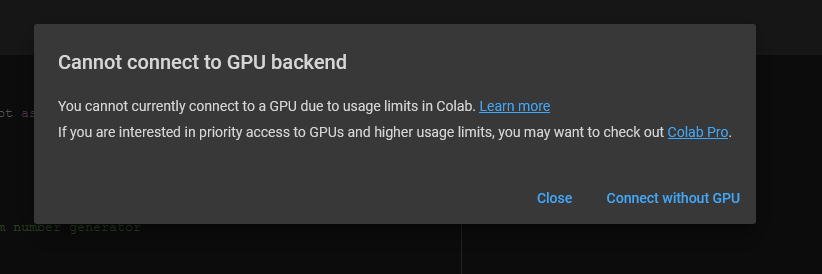